# ScRNA-Seq of human immune cells

Inspired by the work of [Luecken, MD. et al.](https://www.nature.com/articles/s41592-021-01336-8#Sec35)
<br>Code: https://github.com/theislab/scib-reproducibility/tree/main 

In [3]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Read AnnData and add metadata information

In [4]:
file_paths = '../../../../data/processed/immune_cells/merged/'

filenames = ['Oetjen_merged.h5ad', 'Freytag_merged.h5ad', 'Sun_merged.h5ad', '10X_merged.h5ad']

adata = []
for k, name in enumerate(filenames):
    file = file_paths + name
    adata_temp = sc.read(file, cache=True)
    adata.append(adata_temp) 


In [5]:
adata = adata[0].concatenate(adata[1:], batch_key='sample_ID', index_unique=None)

adata.obs.index.rename('barcode', inplace=True)
# Assign adata.X to be the preprocessed unnormalized data
adata.X = adata.layers['pp_counts']

adata

AnnData object with n_obs × n_vars = 36806 × 8468
    obs: 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'outlier', 'size_factors', 'cell_type', 'patientID', 'study', 'chemistry', 'tissue', 'species', 'data_type', 'sample_ID'
    var: 'gene_id-0', 'n_cells-Oetjen_A-0', 'highly_variable-Oetjen_A-0', 'means-Oetjen_A-0', 'dispersions-Oetjen_A-0', 'dispersions_norm-Oetjen_A-0', 'n_cells-Oetjen_N-0', 'highly_variable-Oetjen_N-0', 'means-Oetjen_N-0', 'dispersions-Oetjen_N-0', 'dispersions_norm-Oetjen_N-0', 'n_cells-Oetjen_P-0', 'highly_variable-Oetjen_P-0', 'means-Oetjen_P-0', 'dispersions-Oetjen_P-0', 'dispersions_norm-Oetjen_P-0', 'n_cells-Oetjen_T-0', 'highly_variable-Oetjen_T-0', 'means-Oetjen_T-0', 'dispersions-Oetjen_T-0', 'dispersions_norm-Oetjen_T-0', 'n_cells-Oetjen_U-0', 'highly_variable-Oetjen_U-0', 'means-Oetjen_U-0', 'dispersions-Oetjen_U-0', 'dispersions_norm-Oetjen_U-0', 'gene_ids-1', 'n_cells-1', 'highly_variable-1', 'means-1',

In [6]:
adata.obs.head(5)

,n_counts,log_n_counts,n_genes,log_n_genes,pct_counts_in_top_20_genes,mt_frac,outlier,size_factors,cell_type,patientID,study,chemistry,tissue,species,data_type,sample_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A,6379.0,8.760923,1862,7.529943,0.243769,0.047970,False,1.094988,Non-classical monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,0
AAACCTGCATGTCCTC-1-Oetjen_A,4172.0,8.336390,1082,6.987490,0.321908,0.024928,False,0.718537,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,0
AAACCTGGTCGACTGC-1-Oetjen_A,6608.0,8.796187,1618,7.389564,0.241979,0.051907,False,1.133669,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,0
AAACCTGGTCGCTTCT-1-Oetjen_A,5034.0,8.524169,1413,7.254178,0.265793,0.041716,False,0.865837,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,0
AAACCTGTCCCGACTT-1-Oetjen_A,3998.0,8.293799,1127,7.028201,0.292646,0.043522,False,0.687454,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,0


## Visualize

In [7]:
# Normalize
adata = dp.log1p_normalize(adata)

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


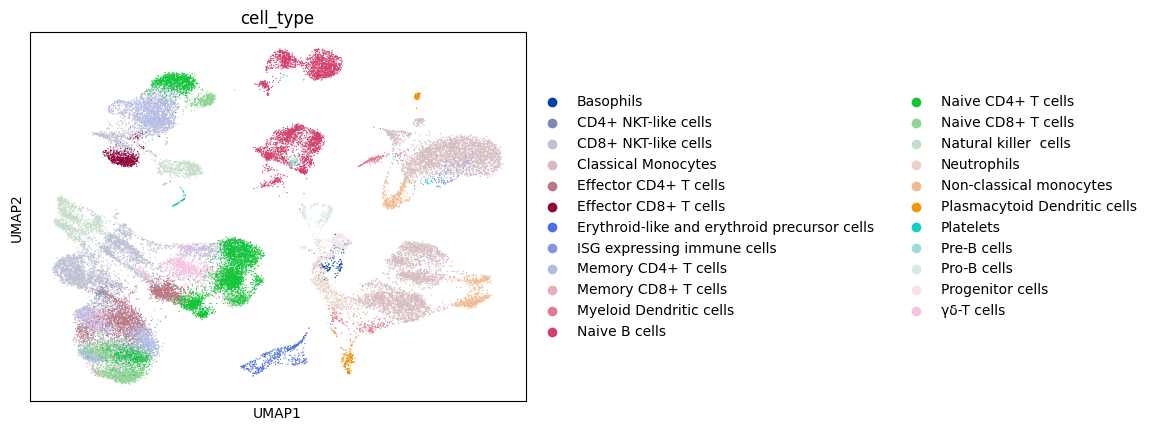

In [18]:
from sklearn.preprocessing import StandardScaler
vis_adata = adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


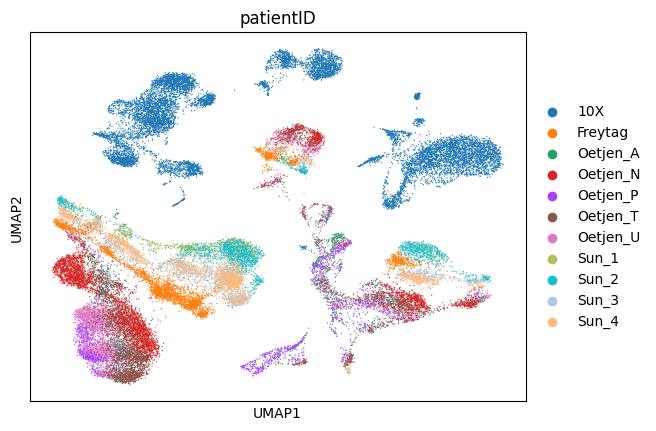

In [19]:
sc.pl.umap(vis_adata, color='patientID')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


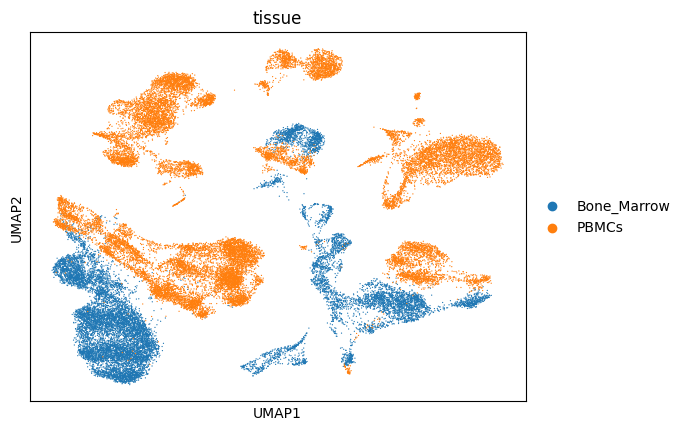

In [20]:
sc.pl.umap(vis_adata, color='tissue')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


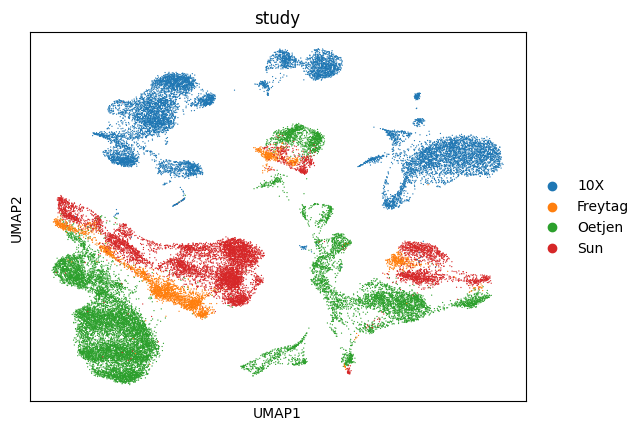

In [21]:
sc.pl.umap(vis_adata, color='study')

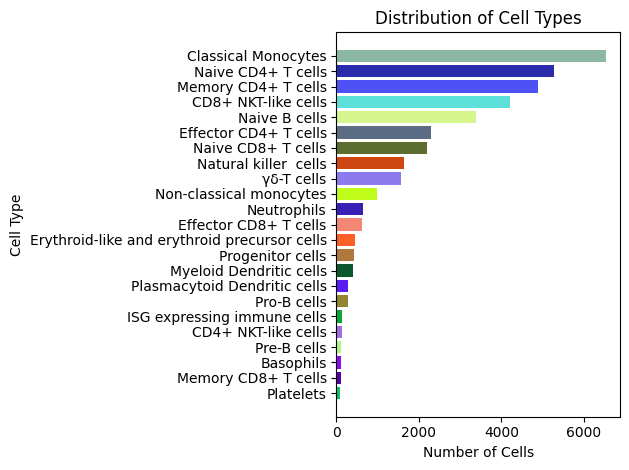

In [26]:
import matplotlib.pyplot as plt
import random

# Visualize distribution of cell types
cell_types = adata.obs["cell_type"]

cell_type_counts = {}
for string in cell_types:
    if string in cell_type_counts:
        cell_type_counts[string] += 1
    else:
        cell_type_counts[string] = 1

sorted_data = sorted(cell_type_counts.items(), key=lambda x: x[1], reverse=False)
unique_strings, counts = zip(*sorted_data)

bar_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in unique_strings]

plt.barh(unique_strings, counts, color=bar_colors)

plt.xlabel('Number of Cells')
plt.ylabel('Cell Type')
plt.title('Distribution of Cell Types')

plt.tight_layout()
plt.show()

## Download processed data, including labels

In [10]:
adata.write("../../../../data/processed/immune_cells/merged/Immune_cells_merged_all.h5ad")